In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [3]:
data.head()

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [4]:
data.shape

(38, 2)

Checking if any duplicate data entry

In [5]:
data.duplicated().sum()

0

In [6]:
data.columns

Index(['Acronyms    ', 'Descriptions'], dtype='object')

In [7]:
data.describe()

,Acronyms,Descriptions
count,38,38
unique,38,38
top,MOBILE_NUMBER,Customer phone number
freq,1,1


In [9]:
#find categorical columns
l=[]

for i in data.columns:
    if data[i].dtype=='object':
        l.append(i)

#find numerical columns 
l1=[]

for i in data.columns:
    if data[i].dtype!='object':
        l1.append(i)

#find date columns
l2=[]

for i in data.columns:
    if data[i].dtype=='datetime64[ns]':
        l2.append(i)

print("The number of categorical values are: ",len(l))
print("The number of numerical values are: ",len(l1))
print("The number of date values are: ",len(l2))

The number of categorical values are:  2
The number of numerical values are:  0
The number of date values are:  0


In [10]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

Missing values handling

In [11]:
data.isnull().sum()*100/data.shape[0]

Acronyms        0.0
Descriptions    0.0
dtype: float64

Lets observe recharge data

In [12]:
recharge= data[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]
last= data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']]

rec=pd.DataFrame()
#add recharge and last list in rec

rec['total_rech_data_6']=recharge['total_rech_data_6']
rec['total_rech_data_7']=recharge['total_rech_data_7']
rec['total_rech_data_8']=recharge['total_rech_data_8']
rec['total_rech_data_9']=recharge['total_rech_data_9']

rec['date_of_last_rech_6']=last['date_of_last_rech_6']
rec['date_of_last_rech_7']=last['date_of_last_rech_7']
rec['date_of_last_rech_8']=last['date_of_last_rech_8']
rec['date_of_last_rech_9']=last['date_of_last_rech_9']

#show only null values
rec[rec.isnull().any(axis=1)]

KeyError: "None of [Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',\n       'total_rech_data_9'],\n      dtype='object')] are in the [columns]"

In [16]:
churn=data.copy()

In [17]:
#impute missing values in total_rech_data_6/7/8/9 with 0

churn['total_rech_data_6']=churn['total_rech_data_6'].fillna(0)
churn['total_rech_data_7']=churn['total_rech_data_7'].fillna(0)
churn['total_rech_data_8']=churn['total_rech_data_8'].fillna(0)
churn['total_rech_data_9']=churn['total_rech_data_9'].fillna(0)

#impute missing values in av_rech_amt_data_6/7/8/9 with 0

churn['av_rech_amt_data_6']=churn['av_rech_amt_data_6'].fillna(0)
churn['av_rech_amt_data_7']=churn['av_rech_amt_data_7'].fillna(0)
churn['av_rech_amt_data_8']=churn['av_rech_amt_data_8'].fillna(0)
churn['av_rech_amt_data_9']=churn['av_rech_amt_data_9'].fillna(0)

#impute missing values in max_rech_data_6/7/8/9 with 0

churn['max_rech_data_6']=churn['max_rech_data_6'].fillna(0)
churn['max_rech_data_7']=churn['max_rech_data_7'].fillna(0)
churn['max_rech_data_8']=churn['max_rech_data_8'].fillna(0)
churn['max_rech_data_9']=churn['max_rech_data_9'].fillna(0)

KeyError: 'total_rech_data_6'

In [18]:
#missing value ratio
churn.isnull().sum()*100/churn.shape[0]

Acronyms        0.0
Descriptions    0.0
dtype: float64

In [19]:
#drop id column along with date columns

churn.drop(['mobile_number','circle_id','date_of_last_rech_6','date_of_last_rech_7',
            'date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
            'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
            'last_date_of_month_9'],axis=1,inplace=True)

KeyError: "['mobile_number', 'circle_id', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'] not found in axis"

In [ ]:
churn.shape

(99999, 212)

In [ ]:
data['night_pck_user_6'].unique(),data['fb_user_6'].unique()

(array([ 0., nan,  1.]), array([ 1., nan,  0.]))

In [ ]:
#lets make new category of -1 for in categorical columns

churn['night_pck_user_6']=churn['night_pck_user_6'].fillna(-1)
churn['night_pck_user_7']=churn['night_pck_user_7'].fillna(-1)
churn['night_pck_user_8']=churn['night_pck_user_8'].fillna(-1)
churn['night_pck_user_9']=churn['night_pck_user_9'].fillna(-1)

churn['fb_user_6']=churn['fb_user_6'].fillna(-1)
churn['fb_user_7']=churn['fb_user_7'].fillna(-1)
churn['fb_user_8']=churn['fb_user_8'].fillna(-1)
churn['fb_user_9']=churn['fb_user_9'].fillna(-1)

In [ ]:
#drop columns with more than 60% missing values

P=churn.isnull().sum()*100/churn.shape[0]

P[P>60]

count_rech_2g_6    74.846748
count_rech_2g_7    74.428744
count_rech_2g_8    73.660737
count_rech_2g_9    74.077741
count_rech_3g_6    74.846748
count_rech_3g_7    74.428744
count_rech_3g_8    73.660737
count_rech_3g_9    74.077741
arpu_3g_6          74.846748
arpu_3g_7          74.428744
arpu_3g_8          73.660737
arpu_3g_9          74.077741
arpu_2g_6          74.846748
arpu_2g_7          74.428744
arpu_2g_8          73.660737
arpu_2g_9          74.077741
dtype: float64

In [ ]:
churn.drop(P[P>60].index,axis=1,inplace=True)

In [ ]:
churn.shape

(99999, 196)

In [ ]:
churn.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.2,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,0.0,0.0,2.91,0.0,0.0,35.39,150.51,299.54,72.11,0.23,4.11,0.0,0.0,0.0,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,

1. FEATURE GENERATION

In [ ]:
#Derive new features

#a. Total data recharge amount for the month (total_rech_data_amt_6/7/8/9)

churn['total_rech_data_amt_6']=churn['total_rech_data_6']*churn['av_rech_amt_data_6']
churn['total_rech_data_amt_7']=churn['total_rech_data_7']*churn['av_rech_amt_data_7']
churn['total_rech_data_amt_8']=churn['total_rech_data_8']*churn['av_rech_amt_data_8']
churn['total_rech_data_amt_9']=churn['total_rech_data_9']*churn['av_rech_amt_data_9']

2. Filter high-value customers

In [ ]:
#filter high value customers

import numpy as np

churn['total_rech_amt_6_7']=churn['total_rech_amt_6']+churn['total_rech_amt_7']

#70th percentile value to define high-value customers

a=np.percentile(churn['total_rech_amt_6_7'],70)

#filter high value customers

churn1=churn[churn['total_rech_amt_6_7']>=a]

churn1.shape


(30011, 201)

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [ ]:
#now tag the churned customers

#churn=1, else 0

churn1['churn']=np.where((churn1['total_ic_mou_9']==0)&(churn1['total_og_mou_9']==0)&(churn1['vol_2g_mb_9']==0)&(churn1['vol_3g_mb_9']==0),1,0)

#find column names with 9th month data

d=churn1.columns[churn1.columns.str.contains('_9')]

#drop columns with 9th month data

churn1.drop(d,axis=1,inplace=True)

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_15316\666147780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1['churn']=np.where((churn1['total_ic_mou_9']==0)&(churn1['total_og_mou_9']==0)&(churn1['vol_2g_mb_9']==0)&(churn1['vol_3g_mb_9']==0),1,0)
C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_15316\666147780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.drop(d,axis=1,inplace=True)


In [ ]:
churn1.shape

(30011, 154)

In [ ]:
churn1.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,2370,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,1038,0


LETS TRY TO USE IMPUTER TO FILL MISSING VALUES

In [ ]:
#impute with mean for columns with missing values

churn1.fillna(churn1.mean(),inplace=True)

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_15316\949407657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.fillna(churn1.mean(),inplace=True)


In [ ]:
#find columns with only one unique value

print(churn1.nunique()[churn1.nunique()==1])

#drop columns with only one unique value

churn1.drop(churn1.nunique()[churn1.nunique()==1].index,axis=1,inplace=True)

loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64


C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_15316\1994980576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.drop(churn1.nunique()[churn1.nunique()==1].index,axis=1,inplace=True)


In [ ]:
#split data into train and test
from sklearn.model_selection import train_test_split

#choose random_state such that train and test data set
df_train,df_test= train_test_split(churn1,train_size=0.7, test_size=0.3, random_state=92)

DIMENSIONALITY REDUCTION USING PCA

In [ ]:
#scale data except target variable

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#scale data

df_train1=scaler.fit_transform(df_train.drop('churn',axis=1))  # type: ignore

In [ ]:
#pca

from sklearn.decomposition import PCA

pca=PCA(random_state=100)

pca.fit(df_train1)

PCA(random_state=100)

MACHINE LEARNING MODELS

In [ ]:
X_train=pca.transform(df_train1)

y=df_train.pop('churn') # type: ignore

In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier as dt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#fit the model

dt=dt(random_state=42)

dt.fit(X_train,y)

#predict on test data

X_test=pca.transform(scaler.transform(df_test.drop('churn',axis=1))) # type: ignore
y_test=df_test.pop('churn') # type: ignore

y_pred=dt.predict(X_test)

In [ ]:
#CONFUSION MATRIX

confusion_matrix(y_test,y_pred)

array([[7713,  557],
       [ 412,  322]], dtype=int64)

In [ ]:
#ACCURACY SCORE

accuracy_score(y_test,y_pred)

0.8923811639271435

In [ ]:
#CLASSIFICATION REPORT

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8270
           1       0.37      0.44      0.40       734

    accuracy                           0.89      9004
   macro avg       0.66      0.69      0.67      9004
weighted avg       0.90      0.89      0.90      9004



LOGISTIC REGRESSION

In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression as lr

#fit the model

li=lr(random_state=42,solver='newton-cg')

li.fit(X_train,y)

LogisticRegression(random_state=42, solver='newton-cg')

In [ ]:
#predict on test data

y_pred2=li.predict(X_test)

In [ ]:
#CONFUSION MATRIX

confusion_matrix(y_test,y_pred2)

array([[8161,  109],
       [ 474,  260]], dtype=int64)

In [ ]:
#ACCURACY SCORE

accuracy_score(y_test,y_pred2)

0.935250999555753

In [ ]:
#CLASSIFICATION REPORT

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8270
           1       0.70      0.35      0.47       734

    accuracy                           0.94      9004
   macro avg       0.82      0.67      0.72      9004
weighted avg       0.93      0.94      0.93      9004



In [ ]:
#feature importance

feature_importance=pd.DataFrame({'feature':df_train.columns,'importance':dt.feature_importances_}) # type: ignore

feature_importance.sort_values(by='importance',ascending=False,inplace=True)

feature_importance.head(10)

,feature,importance
117,night_pck_user_6,0.168265
11,roam_ic_mou_8,0.059691
0,arpu_6,0.054702
113,vol_2g_mb_8,0.032847
128,monthly_3g_8,0.023678
1,arpu_7,0.022343
30,std_og_t2t_mou_6,0.021550
19,loc_og_t2m_mou_7,0.017686
129,sachet_3g_6,0.016942
137,jul_vbc_3g,0.013044


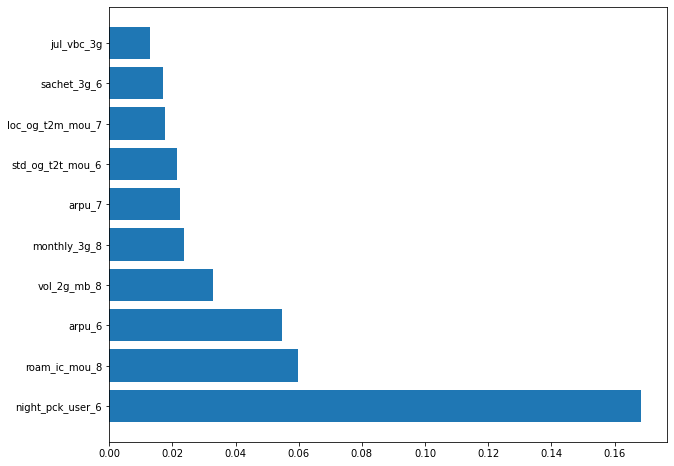

In [ ]:
#plot feature importance

plt.figure(figsize=(10,8))

plt.barh(feature_importance['feature'][:10],feature_importance['importance'][:10])

plt.show()

In [ ]:
#feature importance by logistic regression

feature_importance2=pd.DataFrame({'feature':df_train.columns,'importance':li.coef_[0]}) # type: ignore

feature_importance2.sort_values(by='importance',ascending=False,inplace=True)

feature_importance2.head(10)

,feature,importance
113,vol_2g_mb_8,2.585816
84,isd_ic_mou_6,0.495362
99,last_day_rch_amt_6,0.483341
20,loc_og_t2m_mou_8,0.369713
120,monthly_2g_6,0.341810
41,std_og_mou_8,0.338213
33,std_og_t2m_mou_6,0.334843
53,total_og_mou_8,0.315557
45,spl_og_mou_6,0.291198
48,og_others_6,0.288838


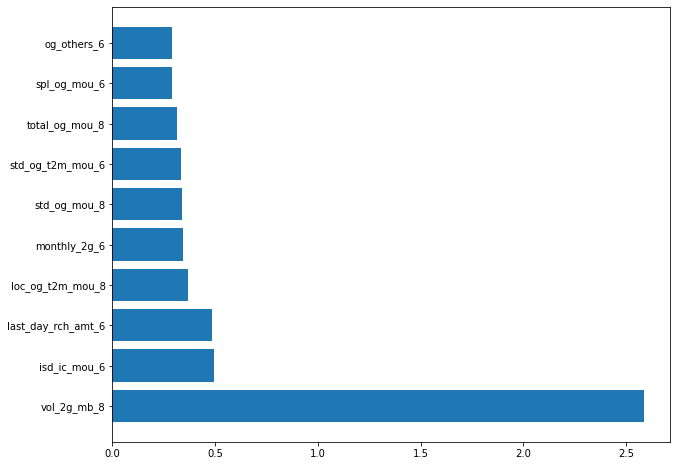

In [ ]:
#plot feature importance

plt.figure(figsize=(10,8))

plt.barh(feature_importance2['feature'][:10],feature_importance2['importance'][:10])

plt.show()

In [ ]:
print(feature_importance2['feature'][:10])

print(feature_importance['feature'][:10])

113           vol_2g_mb_8
84           isd_ic_mou_6
99     last_day_rch_amt_6
20       loc_og_t2m_mou_8
120          monthly_2g_6
41           std_og_mou_8
33       std_og_t2m_mou_6
53         total_og_mou_8
45           spl_og_mou_6
48            og_others_6
Name: feature, dtype: object
117    night_pck_user_6
11        roam_ic_mou_8
0                arpu_6
113         vol_2g_mb_8
128        monthly_3g_8
1                arpu_7
30     std_og_t2t_mou_6
19     loc_og_t2m_mou_7
129         sachet_3g_6
137          jul_vbc_3g
Name: feature, dtype: object


So, the strategy to manage churn can be:

1. Offer discounts on recharge packs to the customers who are likely to churn.
2. Offer discounts on handsets to the customers who are likely to churn.
3. Offer discounts on data packs to the customers who are likely to churn.
4. Offer discounts on voice packs to the customers who are likely to churn.

Except for discounts, freebies can be:

1. Offer freebies to the customers who are likely to churn.
2. Offer free voice calls to the customers who are likely to churn.
3. Offer free data to the customers who are likely to churn.